In [1]:
import numpy as np
import pandas as pd
import LaviRot as lr
import matplotlib.pyplot as plt
from LaviRot.materials import steel
np.set_printoptions(precision=5, linewidth=300)
%matplotlib inline

In [2]:
n_elements = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 80]
speed = 525

In [3]:
shaft_od = 0.08
shaft_id = 0.03
shaft_len = 1.2

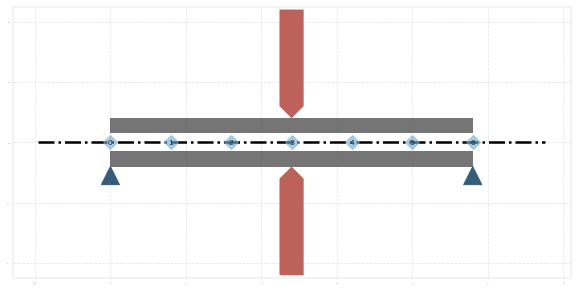

In [4]:
rotors_wn = np.zeros((6, len(n_elements)))

for i, n_el in enumerate(n_elements):
    bearing0 = lr.BearingElement(0, kxx=1e15, cxx=0)
    bearing1 = lr.BearingElement(n_el, kxx=1e15, cxx=0)
    bearings = [bearing0, bearing1]

    L = shaft_len / n_el
    shaft = [lr.ShaftElement(L, shaft_id, shaft_od, steel, rotary_inertia=True, shear_effects=True)
             for i in range(n_el)]
    disk0 = lr.DiskElement(n_el // 2, steel, width=0.08, i_d=shaft_od, o_d=0.4)
    rotor = lr.Rotor(shaft, [disk0], bearings, w=speed)
    if n_el == 6:
        lr.plot_rotor(rotor)
    rotors_wn[:, i] = rotor.wn[:6]

In [5]:
ref = rotors_wn[:, -1].reshape(6, 1)

In [16]:
err = 100 * (rotors_wn - ref) / ref

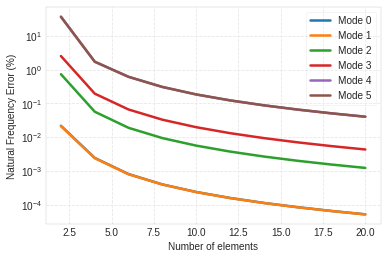

In [17]:
fig, ax = plt.subplots()
lines = ax.semilogy(n_elements[:-1], np.abs(err[:, :-1].T));
ax.set_xlabel('Number of elements')
ax.set_ylabel('Natural Frequency Error (%)')
ax.legend(iter(lines), (f'Mode {i}' for i in range(len(lines))))